# Simple Linear Regression

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---

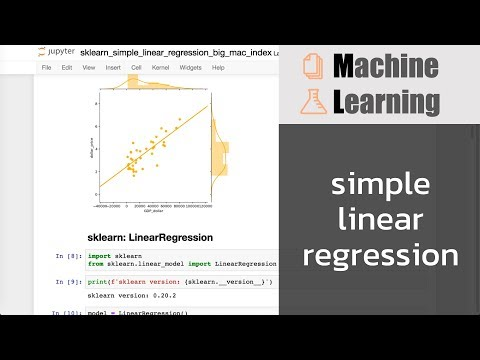

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('1Rkt8Zk3KBM', width=720, height=405)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 1.3.5
numpy   version: 1.21.4
seaborn version: 0.11.2


In [4]:
url='https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv'
df=pd.read_csv(url, parse_dates=['date'])
# df=pd.read_csv(url)
df

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2021-07-01,UKR,UAH,Ukraine,65.00,27.220000,2.387950,3653.110,3.063007,-0.25112,-0.31414,-0.25869,-0.00960,-0.24829
808,2021-07-01,ARE,AED,United Arab Emirates,14.75,3.673150,4.015627,31982.230,4.183747,-0.07801,-0.15560,-0.08734,0.21933,-0.07453
809,2021-07-01,USA,USD,United States,5.65,1.000000,5.650000,63415.990,5.427311,0.00000,-0.08415,-0.01012,0.32250,0.00378
810,2021-07-01,URY,UYU,Uruguay,225.00,44.000000,5.113636,15777.960,3.542683,0.38654,0.26986,0.37252,0.83371,0.39178


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           812 non-null    datetime64[ns]
 1   iso_a3         812 non-null    object        
 2   currency_code  812 non-null    object        
 3   name           812 non-null    object        
 4   local_price    812 non-null    float64       
 5   dollar_ex      812 non-null    float64       
 6   dollar_price   812 non-null    float64       
 7   GDP_dollar     812 non-null    float64       
 8   adj_price      812 non-null    float64       
 9   USD            812 non-null    float64       
 10  EUR            812 non-null    float64       
 11  GBP            812 non-null    float64       
 12  JPY            812 non-null    float64       
 13  CNY            812 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 88.9+ KB


In [6]:
df=df[(df['date'].dt.year==2019) & (df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
554,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,14462.920,3.165211,-0.41927,-0.43420,-0.33846,-0.26107,-0.39584
555,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,55692.730,4.945273,-0.19215,-0.21292,-0.07974,0.02791,-0.15955
556,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9895.765,2.968028,0.40586,0.36972,0.60148,0.78883,0.46259
557,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,39800.274,4.259130,-0.12215,-0.14472,0.00000,0.11698,-0.08673
558,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,45094.605,4.487708,0.04012,0.01338,0.18485,0.32346,0.08209


<Figure size 1152x648 with 0 Axes>

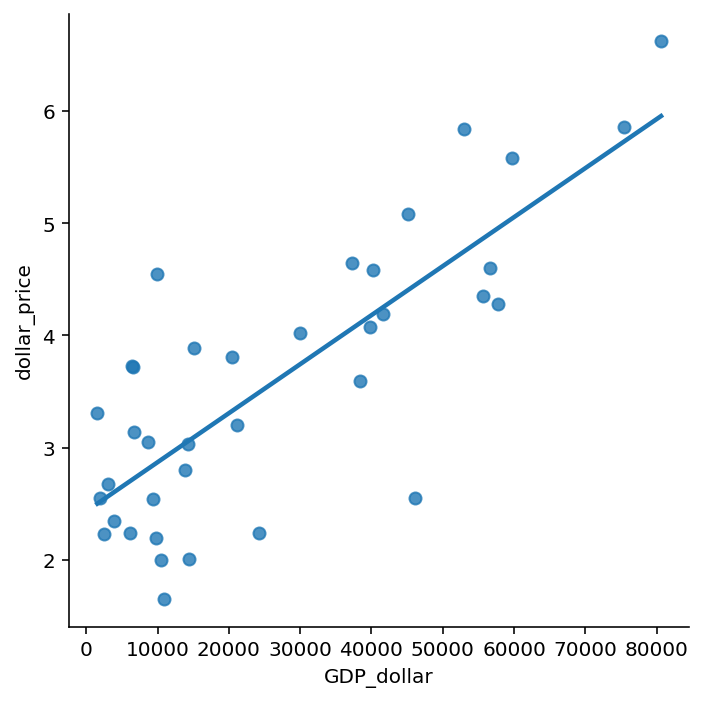

In [7]:
plt.figure(figsize=(16, 9))
sns.lmplot(x='GDP_dollar', y='dollar_price', data=df, ci=None)

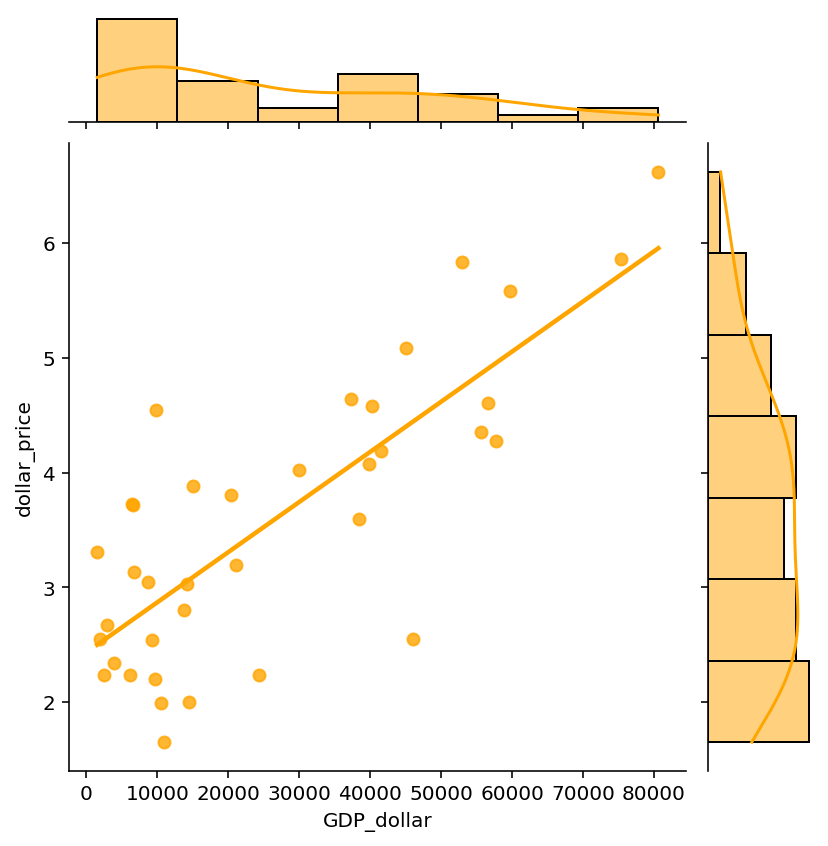

In [8]:
sns.jointplot(x='GDP_dollar', y='dollar_price', data=df, kind='reg', ci=None,
              color='orange');

## sklearn: LinearRegression

In [9]:
import sklearn
from sklearn.linear_model import LinearRegression

In [10]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.0.1


In [11]:
model = LinearRegression() # create object/instance (create an instance from LinearRegression class)
model

LinearRegression()

In [12]:
df['GDP_dollar'].head() # pandas Series

554    14462.920
555    55692.730
556     9895.765
557    39800.274
558    45094.605
Name: GDP_dollar, dtype: float64

In [13]:
df[['GDP_dollar']].head()

,GDP_dollar
554,14462.920
555,55692.730
556,9895.765
557,39800.274
558,45094.605


In [14]:
model.fit(df[['GDP_dollar']], df['dollar_price']) # step 2: fitting model

LinearRegression()

In [15]:
model.score(df[['GDP_dollar']], df['dollar_price']) # step 3: model scoring

0.6312750690042255

In [16]:
df=df[(df['date'].dt.year==2019) & (df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
554,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,14462.920,3.165211,-0.41927,-0.43420,-0.33846,-0.26107,-0.39584
555,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,55692.730,4.945273,-0.19215,-0.21292,-0.07974,0.02791,-0.15955
556,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9895.765,2.968028,0.40586,0.36972,0.60148,0.78883,0.46259
557,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,39800.274,4.259130,-0.12215,-0.14472,0.00000,0.11698,-0.08673
558,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,45094.605,4.487708,0.04012,0.01338,0.18485,0.32346,0.08209


In [17]:
# step 4: predicting
model.predict([
    [14462.920],
    [55692.730],
    [9895.765]
]) # numpy array: X 2-dim array

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.06470091, 4.86628439, 2.86513388])

In [18]:
X=df[['GDP_dollar']] # expect 2D array not Series (1D)
y=df.dollar_price

In [19]:
model.fit(X, y)

LinearRegression()

In [20]:
model.score(X, y) # R-squared

0.6312750690042255

In [21]:
model.intercept_

2.432727161471293

In [22]:
model.coef_

array([4.36961383e-05])

$y=\alpha+\beta x$

In [23]:
model.intercept_ + model.coef_ * 9000

array([2.82599241])

In [ ]:
# error
# model.predict(9000)

In [24]:
model.predict([[9000]]) # 2D array

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.82599241])

In [25]:
model.predict([[9000], 
               [40000]])

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.82599241, 4.18057269])

In [26]:
np.arange(5000, 50001, 2500)

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500,
       50000])

In [ ]:
np.arange(5000, 50001, 2500).reshape(-1, 1) # 2D

array([[ 5000],
       [ 7500],
       [10000],
       [12500],
       [15000],
       [17500],
       [20000],
       [22500],
       [25000],
       [27500],
       [30000],
       [32500],
       [35000],
       [37500],
       [40000],
       [42500],
       [45000],
       [47500],
       [50000]])

In [27]:
model.predict(np.arange(5000, 50001, 2500).reshape(-1, 1))

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.65120785, 2.7604482 , 2.86968854, 2.97892889, 3.08816924,
       3.19740958, 3.30664993, 3.41589027, 3.52513062, 3.63437096,
       3.74361131, 3.85285166, 3.962092  , 4.07133235, 4.18057269,
       4.28981304, 4.39905338, 4.50829373, 4.61753407])

In [28]:
np.linspace(5000, 50000, 20)

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [29]:
np.linspace(5000, 50000, 20).reshape(-1, 1)

array([[ 5000.        ],
       [ 7368.42105263],
       [ 9736.84210526],
       [12105.26315789],
       [14473.68421053],
       [16842.10526316],
       [19210.52631579],
       [21578.94736842],
       [23947.36842105],
       [26315.78947368],
       [28684.21052632],
       [31052.63157895],
       [33421.05263158],
       [35789.47368421],
       [38157.89473684],
       [40526.31578947],
       [42894.73684211],
       [45263.15789474],
       [47631.57894737],
       [50000.        ]])

In [30]:
model.predict(np.linspace(5000, 50000, 20).reshape(-1, 1))

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

In [31]:
s=pd.Series(np.linspace(5000, 50000, 20))
s

0      5000.000000
1      7368.421053
2      9736.842105
3     12105.263158
4     14473.684211
5     16842.105263
6     19210.526316
7     21578.947368
8     23947.368421
9     26315.789474
10    28684.210526
11    31052.631579
12    33421.052632
13    35789.473684
14    38157.894737
15    40526.315789
16    42894.736842
17    45263.157895
18    47631.578947
19    50000.000000
dtype: float64

In [32]:
model.predict(s.to_frame())

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

In [33]:
dx=pd.DataFrame(np.linspace(5000, 50000, 20), columns=['gdp'])
dx

,gdp
0,5000.000000
1,7368.421053
2,9736.842105
3,12105.263158
4,14473.684211
5,16842.105263
6,19210.526316
7,21578.947368
8,23947.368421
9,26315.789474


In [34]:
model.predict(dx)

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- gdp
Feature names seen at fit time, yet now missing:
- GDP_dollar

  warnings.warn(message, FutureWarning)


array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

## Statsmodels: Simple Linear regression

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
# formula: response ~ predictor1 + predictor2
model_a = smf.ols(formula='dollar_price ~ GDP_dollar', data=df).fit()

In [37]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     59.92
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           4.34e-09
Time:                        22:15:37   Log-Likelihood:                -41.445
No. Observations:                  37   AIC:                             86.89
Df Residuals:                      35   BIC:                             90.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4327      0.195     12.479      0.000       2.037       2.828
GDP_dollar   4.37e-05   5.64e-06      7.741      0.000    3.22e-05    5.52e-05
==============================================================================
Omnibus:                        0.604   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.312
Skew:                          -0.225   Prob(JB):                        0.856
Kurtosis:                       2.983   Cond. No.                     5.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     59.92
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           4.34e-09
Time:                        22:16:14   Log-Likelihood:                -41.445
No. Observations:                  37   AIC:                             86.89
Df Residuals:                      35   BIC:                             90.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4327      0.195     12.479      0.0

In [40]:
model_a.pvalues

Intercept     1.915703e-14
GDP_dollar    4.338811e-09
dtype: float64

In [41]:
model.intercept_ # sklearn

2.432727161471293

In [42]:
model.coef_

array([4.36961383e-05])

In [43]:
print(f'{model.coef_[0]:.7f}')

0.0000437


## train-test-split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
len(df)

37

## method 1: split into (train, test)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

In [54]:
print(len(X_train))
print(len(X_test))

25
12


In [55]:
model.fit(X_train, y_train) # step 2: fitting model

LinearRegression()

In [56]:
model.score(X_test, y_test) # step 3: model scoring

0.5328617355238718

In [57]:
# step 4: predicting
model.predict([
    [10000],
    [20000],
    [25000]
]) # numpy array: X 2-dim array

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.69464015, 3.17457653, 3.41454471])

In [58]:
model.intercept_

2.214703775690751

In [59]:
model.coef_

array([4.79936375e-05])

$y=\alpha+\beta x$

In [60]:
model.intercept_ + model.coef_ * 9000

array([2.64664651])

In [61]:
model.predict([[9000]]) # 2D array

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.64664651])

In [62]:
model.predict([[9000], 
               [40000]])

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.64664651, 4.13444928])

In [63]:
np.arange(5000, 50001, 2500)

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500,
       50000])

In [64]:
np.arange(5000, 50001, 2500).reshape(-1, 1) # 2D

array([[ 5000],
       [ 7500],
       [10000],
       [12500],
       [15000],
       [17500],
       [20000],
       [22500],
       [25000],
       [27500],
       [30000],
       [32500],
       [35000],
       [37500],
       [40000],
       [42500],
       [45000],
       [47500],
       [50000]])

In [65]:
model.predict(np.arange(5000, 50001, 2500).reshape(-1, 1))

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.45467196, 2.57465606, 2.69464015, 2.81462424, 2.93460834,
       3.05459243, 3.17457653, 3.29456062, 3.41454471, 3.53452881,
       3.6545129 , 3.774497  , 3.89448109, 4.01446518, 4.13444928,
       4.25443337, 4.37441746, 4.49440156, 4.61438565])

In [66]:
np.linspace(5000, 50000, 20)

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [67]:
np.linspace(5000, 50000, 20).reshape(-1, 1)

array([[ 5000.        ],
       [ 7368.42105263],
       [ 9736.84210526],
       [12105.26315789],
       [14473.68421053],
       [16842.10526316],
       [19210.52631579],
       [21578.94736842],
       [23947.36842105],
       [26315.78947368],
       [28684.21052632],
       [31052.63157895],
       [33421.05263158],
       [35789.47368421],
       [38157.89473684],
       [40526.31578947],
       [42894.73684211],
       [45263.15789474],
       [47631.57894737],
       [50000.        ]])

In [68]:
model.predict(np.linspace(5000, 50000, 20).reshape(-1, 1))

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.45467196, 2.5683411 , 2.68201025, 2.79567939, 2.90934853,
       3.02301767, 3.13668681, 3.25035595, 3.3640251 , 3.47769424,
       3.59136338, 3.70503252, 3.81870166, 3.9323708 , 4.04603994,
       4.15970909, 4.27337823, 4.38704737, 4.50071651, 4.61438565])

In [69]:
s=pd.Series(np.linspace(5000, 50000, 20))
s

0      5000.000000
1      7368.421053
2      9736.842105
3     12105.263158
4     14473.684211
5     16842.105263
6     19210.526316
7     21578.947368
8     23947.368421
9     26315.789474
10    28684.210526
11    31052.631579
12    33421.052632
13    35789.473684
14    38157.894737
15    40526.315789
16    42894.736842
17    45263.157895
18    47631.578947
19    50000.000000
dtype: float64

In [70]:
model.predict(s.to_frame())

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.45467196, 2.5683411 , 2.68201025, 2.79567939, 2.90934853,
       3.02301767, 3.13668681, 3.25035595, 3.3640251 , 3.47769424,
       3.59136338, 3.70503252, 3.81870166, 3.9323708 , 4.04603994,
       4.15970909, 4.27337823, 4.38704737, 4.50071651, 4.61438565])

In [71]:
dx=pd.DataFrame(np.linspace(5000, 50000, 20), columns=['gdp'])
dx

,gdp
0,5000.000000
1,7368.421053
2,9736.842105
3,12105.263158
4,14473.684211
5,16842.105263
6,19210.526316
7,21578.947368
8,23947.368421
9,26315.789474


In [72]:
model.predict(dx)

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- gdp
Feature names seen at fit time, yet now missing:
- GDP_dollar

  warnings.warn(message, FutureWarning)


array([2.45467196, 2.5683411 , 2.68201025, 2.79567939, 2.90934853,
       3.02301767, 3.13668681, 3.25035595, 3.3640251 , 3.47769424,
       3.59136338, 3.70503252, 3.81870166, 3.9323708 , 4.04603994,
       4.15970909, 4.27337823, 4.38704737, 4.50071651, 4.61438565])